In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [5]:
df = pd.read_csv("../data/raw/Workforce/Employment_Rate.csv")
df.head()

,Month,Total nonfarm,Total private,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Utilities,Information,Financial activities,Professional and business services,Private education and health services,Leisure and hospitality,Other services,Government,Federal government,State government,Local government
0,Mar-05,"133,152","111,412",616,"7,181","14,268","5,669.20","15,165.90","4,320.30",555.0,"3,062","8,139","16,826","17,506","12,718","5,386","21,740","2,733","5,013","13,994"
1,Apr-05,"133,519","111,765",620,"7,266","14,249","5,681.10","15,215.20","4,335.50",554.2,"3,066","8,150","16,888","17,546","12,802","5,392","21,754","2,725","5,019","14,010"
2,May-05,"133,689","111,908",621,"7,294","14,255","5,692.70","15,232.10","4,345.20",553.8,"3,062","8,154","16,910","17,607","12,797","5,384","21,781","2,734","5,022","14,025"
3,Jun-05,"133,947","112,184",624,"7,333","14,227","5,703.20","15,266.20","4,345.90",553.2,"3,057","8,172","16,999","17,669","12,837","5,397","21,763","2,733","5,029","14,001"
4,Jul-05,"134,300","112,443",626,"7,353","14,225","5,712.60","15,307.70","4,358.40",553.9,"3,061","8,191","17,065","17,719","12,867","5,403","21,857","2,728","5,040","14,089"


In [6]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Month                                  241 non-null    object 
 1   Total nonfarm                          241 non-null    object 
 2   Total private                          241 non-null    object 
 3   Mining and logging                     241 non-null    int64  
 4   Construction                           241 non-null    object 
 5   Manufacturing                          241 non-null    object 
 6   Wholesale trade                        241 non-null    object 
 7   Retail trade                           241 non-null    object 
 8   Transportation and warehousing         241 non-null    object 
 9   Utilities                              241 non-null    float64
 10  Information                            241 non-null    object 
 11  Financ

(None,
 Month                                    0
 Total nonfarm                            0
 Total private                            0
 Mining and logging                       0
 Construction                             0
 Manufacturing                            0
 Wholesale trade                          0
 Retail trade                             0
 Transportation and warehousing           0
 Utilities                                0
 Information                              0
 Financial activities                     0
 Professional and business services       0
 Private education and health services    0
 Leisure and hospitality                  0
 Other services                           0
 Government                               1
 Federal government                       1
 State government                         1
 Local government                         1
 dtype: int64)

In [7]:
df_clean = df.dropna().reset_index(drop=True)

df_clean.isnull().sum(), df_clean.shape

(Month                                    0
 Total nonfarm                            0
 Total private                            0
 Mining and logging                       0
 Construction                             0
 Manufacturing                            0
 Wholesale trade                          0
 Retail trade                             0
 Transportation and warehousing           0
 Utilities                                0
 Information                              0
 Financial activities                     0
 Professional and business services       0
 Private education and health services    0
 Leisure and hospitality                  0
 Other services                           0
 Government                               0
 Federal government                       0
 State government                         0
 Local government                         0
 dtype: int64,
 (240, 20))

In [8]:
for col in df_clean.columns:
    if col != 'Month':
     df_clean[col] = (
         df_clean[col]
            .astype(str)               # Ensure it's string to use .str
            .str.replace(',', '', regex=False)  # Remove commas
            .str.strip()               # Remove extra spaces
        )
     df_clean[col] = pd.to_numeric (df_clean[col], errors='coerce')

# Confirm conversion worked on a few columns df_clean[['Month', 'Manufacturing', 'Total nonfarm', 'Retail trade']].head()

In [9]:
df_clean['Month'].apply(type).value_counts()
df_clean['Month'] = pd.to_datetime(df_clean['Month'], format="%b-%y", errors='coerce')

df_clean['Year'] = df_clean['Month'].dt.year
df_clean['Month_num'] = df_clean['Month'].dt.month

In [10]:
df_clean.head()

,Month,Total nonfarm,Total private,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Utilities,...,Professional and business services,Private education and health services,Leisure and hospitality,Other services,Government,Federal government,State government,Local government,Year,Month_num
0,2005-03-01,133152,111412,616,7181,14268,5669.2,15165.9,4320.3,555.0,...,16826,17506,12718,5386,21740,2733,5013,13994,2005,3
1,2005-04-01,133519,111765,620,7266,14249,5681.1,15215.2,4335.5,554.2,...,16888,17546,12802,5392,21754,2725,5019,14010,2005,4
2,2005-05-01,133689,111908,621,7294,14255,5692.7,15232.1,4345.2,553.8,...,16910,17607,12797,5384,21781,2734,5022,14025,2005,5
3,2005-06-01,133947,112184,624,7333,14227,5703.2,15266.2,4345.9,553.2,...,16999,17669,12837,5397,21763,2733,5029,14001,2005,6
4,2005-07-01,134300,112443,626,7353,14225,5712.6,15307.7,4358.4,553.9,...,17065,17719,12867,5403,21857,2728,5040,14089,2005,7


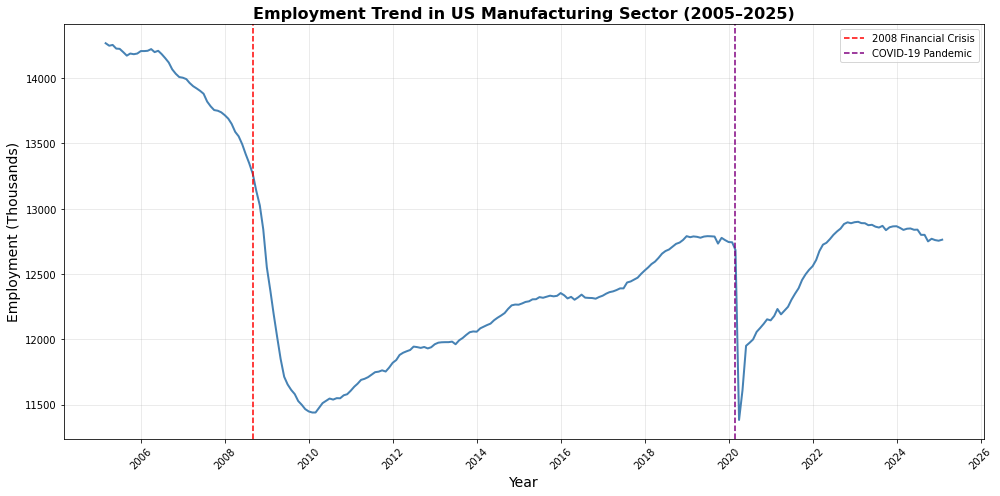

In [8]:
# plt.plot(df_clean['Month'], df_clean['Manufacturing'], color='steelblue')

# Plot Manufacturing Employment Trend over time
plt.figure(figsize=(14, 7))
plt.plot(df_clean['Month'], df_clean['Manufacturing'], color='steelblue', linewidth=2)

# Title and labels
plt.title('Employment Trend in US Manufacturing Sector (2005–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment (Thousands)', fontsize=14)

# Vertical lines without converting to numeric
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle='--', label='COVID-19 Pandemic')

# Formatting the x-axis as dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

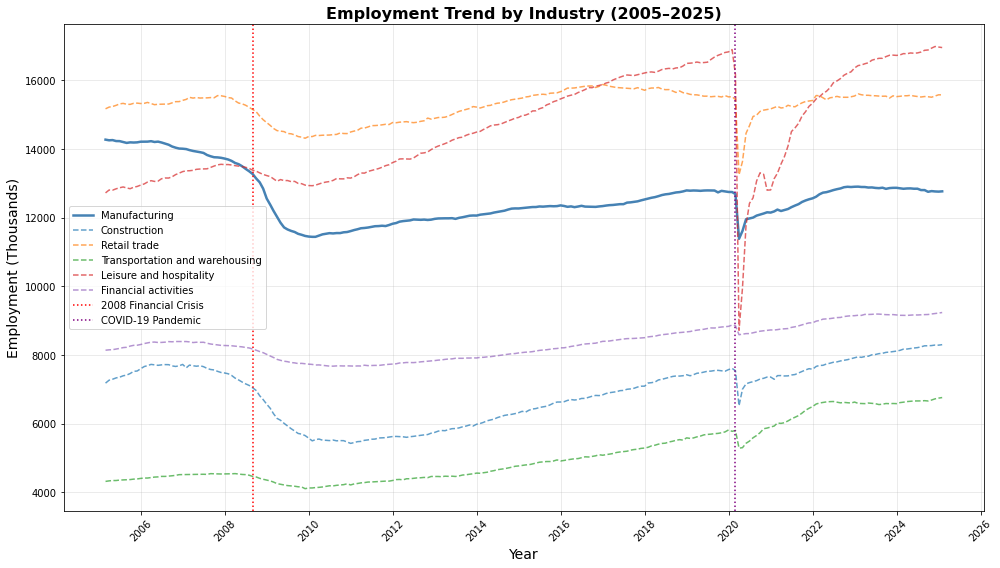

In [9]:
industries_to_plot = [
    'Manufacturing',
    'Construction',
    'Retail trade',
    'Transportation and warehousing',
    'Leisure and hospitality',
    'Financial activities'
]

plt.figure(figsize=(14, 8))

for industry in industries_to_plot:
    if industry == 'Manufacturing':
        plt.plot(df_clean['Month'], df_clean[industry], label=industry, color='steelblue', linewidth=2.5)
    else:
        plt.plot(df_clean['Month'], df_clean[industry], label=industry, linestyle='--', alpha=0.7)

# Title and axis labels
plt.title('Employment Trend by Industry (2005–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment (Thousands)', fontsize=14)

# Mark economic events
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle=':', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle=':', label='COVID-19 Pandemic')

# X-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Grid, legend, and layout
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_668773/2087120141.py:19: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_pct_change = df_reset[employment_columns].resample('Q').mean().pct_change() * 100
/tmp/ipykernel_668773/2087120141.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_abs_change = df_reset[employment_columns].resample('Q').mean().diff()


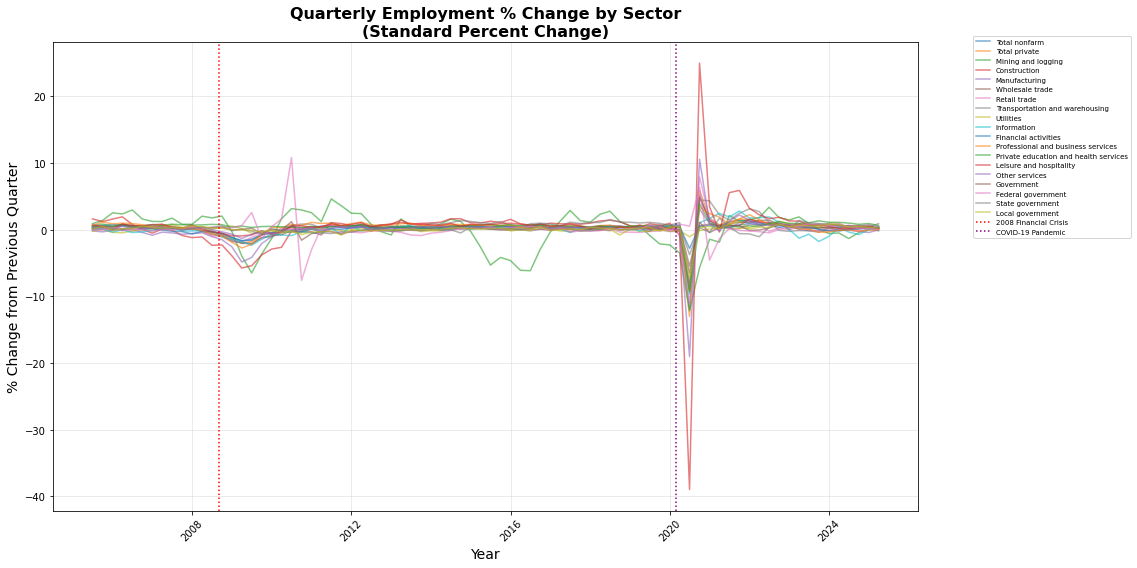

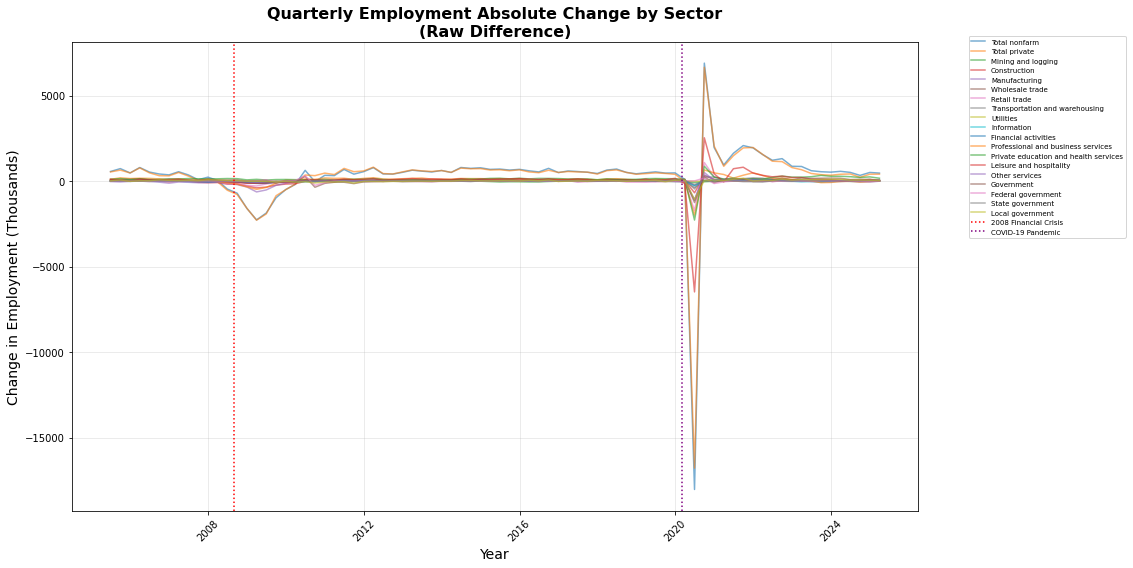

In [16]:
# Identify employment columns (exclude datetime & metadata columns)
exclude_cols = ['Month', 'Year', 'Month_num']
employment_columns = [col for col in df_clean.columns if col not in exclude_cols]

# Calculate monthly employment rate change: (prev - current) / current * 100
df_change = df_clean[['Month']].copy()
for col in employment_columns:
    df_change[col + '_Change'] = df_clean[col].diff() * -1 / df_clean[col] * 100

# Drop missing values
df_change = df_change.dropna()

# Fix error: ensure all invalid datetime rows are removed before resampling
df_reset = df_clean.reset_index()
df_reset = df_reset.dropna(subset=['Month'])
df_reset = df_reset.set_index('Month')

# Now safely perform quarterly resampling
df_pct_change = df_reset[employment_columns].resample('Q').mean().pct_change() * 100
df_abs_change = df_reset[employment_columns].resample('Q').mean().diff()

# Reset index for plotting
df_pct_change = df_pct_change.reset_index()
df_abs_change = df_abs_change.reset_index()

# === PLOT: Option 1 - Percentage Change ===
plt.figure(figsize=(16, 8))
for col in employment_columns:
    plt.plot(df_pct_change['Month'], df_pct_change[col], label=col, alpha=0.6)

plt.title('Quarterly Employment % Change by Sector\n(Standard Percent Change)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('% Change from Previous Quarter', fontsize=14)
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle=':', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle=':', label='COVID-19 Pandemic')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02), fontsize=7)
plt.tight_layout()
plt.show()

# === PLOT: Option 2 - Absolute Change ===
plt.figure(figsize=(16, 8))
for col in employment_columns:
    plt.plot(df_abs_change['Month'], df_abs_change[col], label=col, alpha=0.6)

plt.title('Quarterly Employment Absolute Change by Sector\n(Raw Difference)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Change in Employment (Thousands)', fontsize=14)
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle=':', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle=':', label='COVID-19 Pandemic')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02), fontsize=7)
plt.tight_layout()
plt.show()

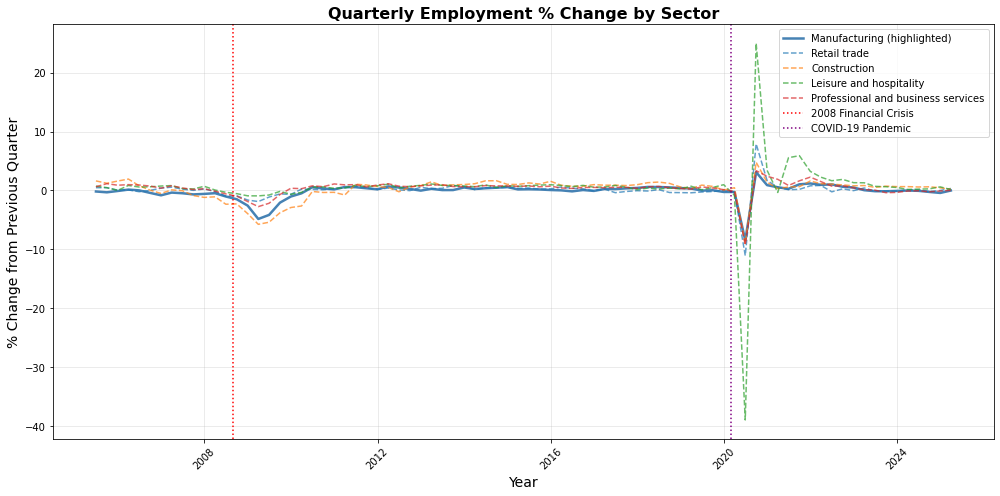

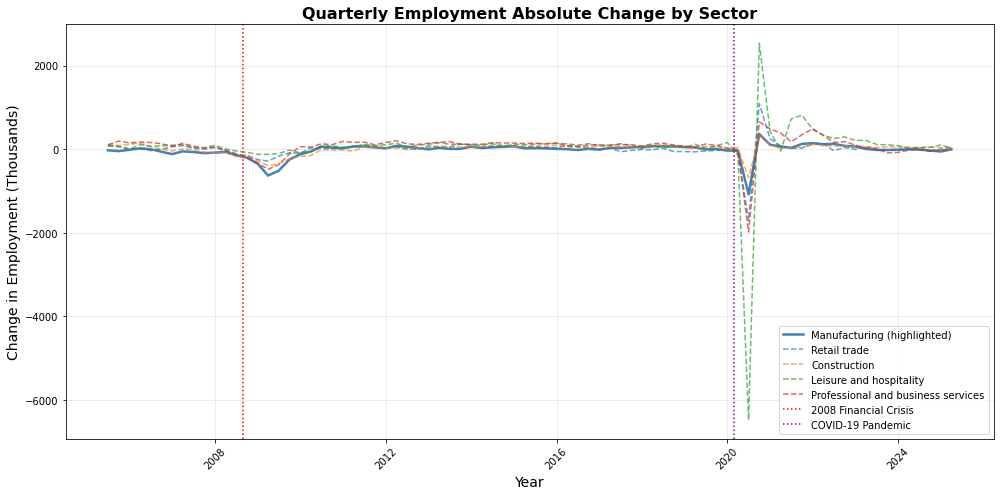

In [18]:
# Select 5 key sectors and highlight manufacturing
selected_sectors = [
    'Manufacturing',
    'Retail trade',
    'Construction',
    'Leisure and hospitality',
    'Professional and business services'
]

# === PLOT: Standard % Change from Previous Quarter ===
plt.figure(figsize=(14, 7))

for col in selected_sectors:
    if col == 'Manufacturing':
        plt.plot(df_pct_change['Month'], df_pct_change[col], label=col + " (highlighted)", color='steelblue', linewidth=2.5)
    else:
        plt.plot(df_pct_change['Month'], df_pct_change[col], label=col, linestyle='--', alpha=0.7)

plt.title('Quarterly Employment % Change by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('% Change from Previous Quarter', fontsize=14)
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle=':', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle=':', label='COVID-19 Pandemic')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# === PLOT: Absolute Change from Previous Quarter ===
plt.figure(figsize=(14, 7))

for col in selected_sectors:
    if col == 'Manufacturing':
        plt.plot(df_abs_change['Month'], df_abs_change[col], label=col + " (highlighted)", color='steelblue', linewidth=2.5)
    else:
        plt.plot(df_abs_change['Month'], df_abs_change[col], label=col, linestyle='--', alpha=0.7)

plt.title('Quarterly Employment Absolute Change by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Change in Employment (Thousands)', fontsize=14)
plt.axvline(pd.Timestamp('2008-09-01'), color='red', linestyle=':', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle=':', label='COVID-19 Pandemic')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# RUN THIS CELL!

In [11]:
import pandas as pd
import altair as alt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import VBox

industries_to_plot = [
    'Manufacturing',
    'Construction',
    'Retail trade',
    'Transportation and warehousing',
    'Leisure and hospitality',
    'Financial activities'
]

df_long = df_clean.melt(
    id_vars=['Month'],
    value_vars=industries_to_plot,
    var_name='Industry',
    value_name='Employment'
)

start_picker = widgets.SelectionSlider(
    options=list(df_clean['Month'].dt.to_period('M').astype(str)),
    description='Start Month',
    layout=widgets.Layout(width='800px')
)

end_picker = widgets.SelectionSlider(
    options=list(df_clean['Month'].dt.to_period('M').astype(str)),
    description='End Month',
    layout=widgets.Layout(width='800px')
)

btn = widgets.Button(description="Calculate % Change", button_style='success')
out = widgets.Output()

trend_chart = alt.Chart(df_long).mark_line().encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Employment:Q', title='Employment (Thousands)'),
    color=alt.Color('Industry:N', scale=alt.Scale(scheme='category10')),
    tooltip=['Month:T', 'Industry:N', 'Employment:Q']
).properties(
    width=800,
    height=400,
    title='Employment Trend by Industry (2005–2025)'
)

display(trend_chart)

display(VBox([start_picker, end_picker, btn]))

display(out)

def on_button_clicked(b):
    with out:
        out.clear_output()

        start = pd.to_datetime(start_picker.value)
        end = pd.to_datetime(end_picker.value)

        if start >= end:
            print("⚠️ Start date must be earlier than End date!")
            return

        start_vals = df_long[df_long['Month'] == start]
        end_vals = df_long[df_long['Month'] == end]

        if start_vals.empty or end_vals.empty:
            print("⚠️ Selected dates not available in data!")
            return

        compare = pd.merge(
            start_vals,
            end_vals,
            on='Industry',
            suffixes=('_start', '_end')
        )

        compare['Change'] = (compare['Employment_end'] - compare['Employment_start']) / compare['Employment_end'] * 100

        bar = alt.Chart(compare).mark_bar().encode(
            x=alt.X('Industry:N', title='Industry'),
            y=alt.Y('Change:Q', title='% Change (End - Start) / End × 100'),
            color=alt.condition(
                alt.datum.Change > 0,
                alt.value('steelblue'),
                alt.value('orangered')
            ),
            tooltip=[
                alt.Tooltip('Industry:N'),
                alt.Tooltip('Change:Q', format='.2f')
            ]
        ).properties(
            width=800,
            height=300,
            title=f'% Change from {start_picker.value} to {end_picker.value}'
        )

        display(bar)

btn.on_click(on_button_clicked)


alt.Chart(...)

Output()